In [262]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

In [265]:
pd = pd.read_csv("week8gss.csv", engine = "python", encoding = "cp1252",)
pd_timeseries = pd[["year", "income"]]
pd_timeseries = pd_timeseries[~(pd_timeseries["income"].str.contains("Inapplicable"))]
pd_timeseries = pd_timeseries[~(pd_timeseries["income"].str.contains("Do not Know"))]
pd_timeseries = pd_timeseries[~(pd_timeseries["income"].str.contains("Refused"))]
pd_timeseries = pd_timeseries[~(pd_timeseries["income"].str.contains("No answer"))]
pd_timeseries = pd_timeseries[~(pd_timeseries["income"].str.contains("Skipped"))]

pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('[\$,]','',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('Under 1000','0',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('1000 to 2999','1000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('3000 to 3999','3000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('4000 to 4999','4000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('5000 to 5999','5000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('6000 to 6999','6000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('7000 to 7999','7000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('8000 to 9999','8000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('10000 to 14999','10000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('15000 to 19999','15000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('20000 to 24999','20000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].replace('25000 or more','25000',regex=True)
pd_timeseries[["income"]] = pd_timeseries[["income"]].astype(float)
pd_timeseries

,year,income
1613,1973,10000.0
1614,1973,7000.0
1615,1973,10000.0
1616,1973,10000.0
1617,1973,10000.0
...,...,...
68841,2021,8000.0
68842,2021,25000.0
68843,2021,25000.0
68844,2021,1000.0


In [266]:
pd_timeseries["rolling"] = pd_timeseries["income"].rolling(100).mean()
pd_timeseries.head()

,year,income,rolling
1613,1973,10000.0,NaN
1614,1973,7000.0,NaN
1615,1973,10000.0,NaN
1616,1973,10000.0,NaN
1617,1973,10000.0,NaN


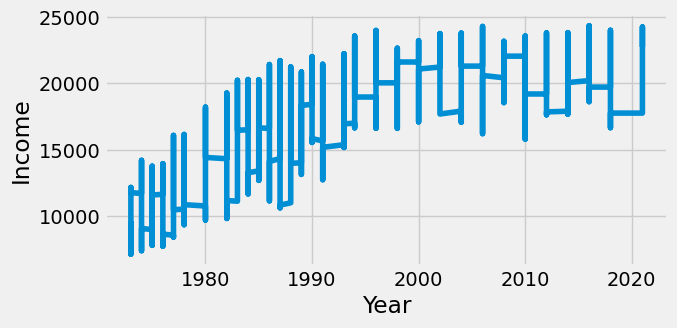

In [267]:
plt.plot(pd_timeseries["year"], pd_timeseries["rolling"])
plt.ylabel("Income")
plt.xlabel("Year")

plt.show()

In [268]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(pd_timeseries["income"])
adf[0]

-11.432451821054219

In [269]:
adf[4]

{'1%': -3.4304585083053105,
 '5%': -2.861587958622551,
 '10%': -2.566795526757292}

In [270]:
adf

(-11.432451821054219,
 6.466990697518248e-21,
 60,
 60268,
 {'1%': -3.4304585083053105,
  '5%': -2.861587958622551,
  '10%': -2.566795526757292},
 1241340.2707276426)

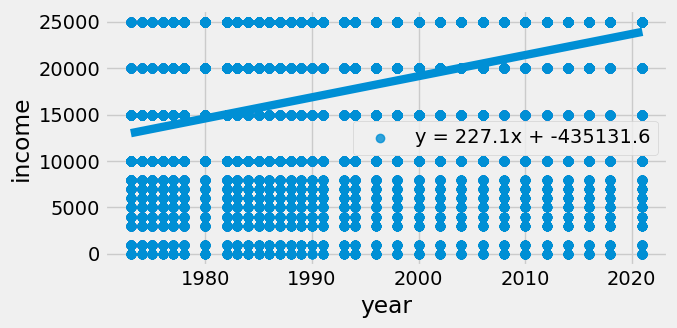

In [283]:
task2_x = pd_timeseries["year"]
task2_y = pd_timeseries["income"]

slope, intercept, r_value, p_value, std_err = st.linregress(task2_x, task2_y)

sns.regplot(task2_x, task2_y, data = pd_timeseries, ci = None, 
            label = "y = {0:.1f}x + {1:.1f}".format(slope, intercept)).legend(loc = "best")

In [275]:
task2_model = st.linregress(task2_x, task2_y)
task2_model

LinregressResult(slope=227.13131359284944, intercept=-435131.55028017674, rvalue=0.3923426258886583, pvalue=0.0, stderr=2.1679941180322824, intercept_stderr=4329.261640010299)